In [1]:
%load_ext autoreload
%autoreload 2

import pkg_resources
import yaml
import datetime
import json

from dt_output import get_dt_output
from verif.obs import ddb, utils
from verif.models import dt_verif

import pandas as pd
import numpy as np
import xarray as xr
from scipy.stats import norm

# DeepThought Verification example

Leveraging the dt-output package for dt forecast extraction and merging with obs datasources (DDB hourly)

## DLITE

In [3]:
wmo_code = '93439'
model = 'DLITE' 
model_var = 'TTTTT'
obs_source = 'DDB_obs' 
dt_start = datetime.datetime(2023, 3, 1)
dt_end = datetime.datetime(2023, 3, 31)
freq='hourly'

In [34]:
dlite_verif = dt_verif.verify_dt_ouput(wmo_code, dt_start, dt_end, model_var, model)
dlite_verif

opening ['metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-dlite/forecast/polishing_TTTTTblend_TTTTT/93439/93439-2023-M3.nc']


/home/benv/dev/DT-Output/dt_output/download.py:186: UserWarning: rename 'run' to 'basetime' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename({"run" : "basetime"})


<xarray.Dataset>
Dimensions:           (basetime: 61, prognosis_period: 373, pdf_index: 1)
Coordinates:
  * prognosis_period  (prognosis_period) timedelta64[ns] 00:00:00 ... 15 days...
  * basetime          (basetime) datetime64[ns] 2023-03-01 ... 2023-03-31
Dimensions without coordinates: pdf_index
Data variables:
    validtime         (basetime, prognosis_period) datetime64[ns] 2023-03-01 ...
    obs_TTTTT         (basetime, prognosis_period) float32 21.4 22.0 ... nan nan
    mean              (basetime, prognosis_period, pdf_index) float32 19.81 ....
    var               (basetime, prognosis_period, pdf_index) float32 1.292 ....
    std               (basetime, prognosis_period, pdf_index) float32 1.137 ....
    p_obs             (basetime, prognosis_period) float32 0.1452 0.1197 ... nan
    cp_obs            (basetime, prognosis_period) float32 0.8903 0.9181 ... nan
    negloglik         (basetime, prognosis_period) float32 1.929 2.123 ... nan
    crps              (basetime, prognosis_period) float32 0.9947 1.141 ... nan
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       DLITE
    DT_job_type:   polishing
    pdf_type:      0

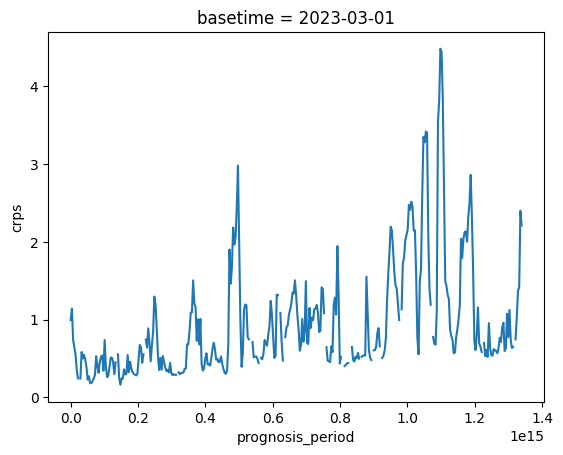

In [35]:
dlite_verif.isel(basetime=0)['crps'].plot()

## ePD

Same verification of ePD

In [36]:
model = 'ePD'

epd_verif = dt_verif.verify_dt_ouput(wmo_code, dt_start, dt_end, model_var, model)
epd_verif

opening ['metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/forecast/polishing_TTTTTblend1_TTTTT/93439/93439-2023-M3.nc']


/home/benv/dev/DT-Output/dt_output/download.py:186: UserWarning: rename 'run' to 'basetime' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename({"run" : "basetime"})


<xarray.Dataset>
Dimensions:           (basetime: 721, prognosis_period: 361)
Coordinates:
  * prognosis_period  (prognosis_period) timedelta64[ns] 00:00:00 ... 15 days...
  * basetime          (basetime) datetime64[ns] 2023-03-01 ... 2023-03-31
Data variables:
    validtime         (basetime, prognosis_period) datetime64[ns] 2023-03-01 ...
    obs_TTTTT         (basetime, prognosis_period) float32 21.4 22.0 ... nan nan
    mean              (basetime, prognosis_period) float32 19.76 20.24 ... 16.6
    var               (basetime, prognosis_period) float32 1.993 1.963 ... 7.835
    std               (basetime, prognosis_period) float32 1.498 1.458 ... 2.885
    p_obs             (basetime, prognosis_period) float32 0.1377 ... nan
    cp_obs            (basetime, prognosis_period) float32 0.9244 0.9531 ... nan
    negloglik         (basetime, prognosis_period) float32 1.983 2.354 ... nan
    crps              (basetime, prognosis_period) float32 1.275 1.323 ... nan
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       ePD
    DT_job_type:   polishing
    pdf_type:      3

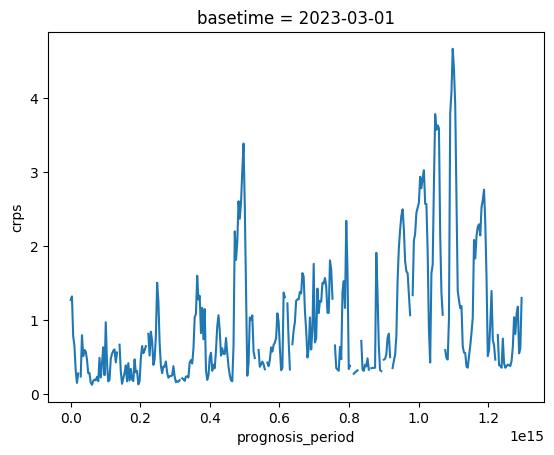

In [37]:
epd_verif.isel(basetime=0)['crps'].plot()

In [72]:
dlite_verif['obs_TTTTT']

<xarray.DataArray 'obs_TTTTT' (basetime: 61, prognosis_period: 373)>
array([[21.4, 22. , 21.8, ..., 18.6, 19.6, 19.2],
       [18.3, 18.2, 18. , ..., 20.1, 20.7, 22.2],
       [22.1, 22.6, 21. , ...,  nan, 20.1, 20.2],
       ...,
       [13.4, 13.6, 14. , ...,  nan,  nan,  nan],
       [13.4, 13.1, 12.2, ...,  nan,  nan,  nan],
       [18.1,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * prognosis_period  (prognosis_period) timedelta64[ns] 00:00:00 ... 15 days...
  * basetime          (basetime) datetime64[ns] 2023-03-01 ... 2023-03-31

## Wind

In [4]:
model_var = 'fff10'
model = 'DLITE'

In [11]:
dlite_verif = dt_verif.verify_dt_ouput(wmo_code, dt_start, dt_end, model_var, model)
dlite_verif

opening ['metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-dlite/forecast/polishing_fff10blend_fff10/93439/93439-2023-M3.nc']


/home/benv/dev/DT-Output/dt_output/download.py:186: UserWarning: rename 'run' to 'basetime' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename({"run" : "basetime"})


<xarray.Dataset>
Dimensions:           (basetime: 61, prognosis_period: 373)
Coordinates:
  * prognosis_period  (prognosis_period) timedelta64[ns] 00:00:00 ... 15 days...
  * basetime          (basetime) datetime64[ns] 2023-03-01 ... 2023-03-31
Data variables:
    validtime         (basetime, prognosis_period) datetime64[ns] 2023-03-01 ...
    obs_fff10         (basetime, prognosis_period) float32 10.0 12.0 ... nan nan
    mean              (basetime, prognosis_period) float32 11.35 11.52 ... 12.89
    var               (basetime, prognosis_period) float32 14.72 16.77 ... 97.57
    std               (basetime, prognosis_period) float32 3.515 3.702 ... 7.268
    p_obs             (basetime, prognosis_period) float32 0.1263 0.1333 ... nan
    cp_obs            (basetime, prognosis_period) float32 0.3149 0.5644 ... nan
    negloglik         (basetime, prognosis_period) float32 2.069 2.015 ... nan
    crps              (basetime, prognosis_period) float32 0.8213 0.5311 ... nan
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    fff10
    DT_kind:       DLITE
    DT_job_type:   polishing
    pdf_type:      3

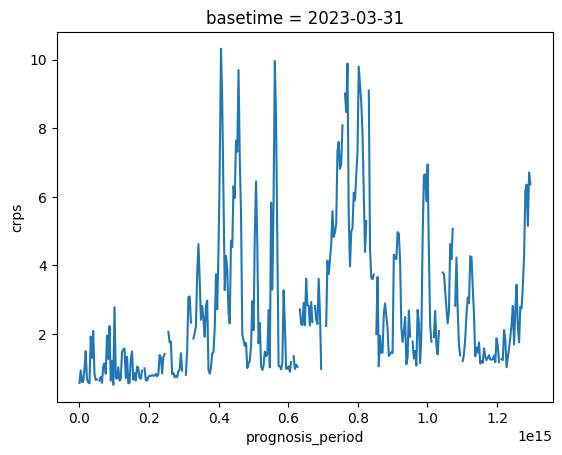

In [13]:
dlite_verif.isel(basetime=60)['crps'].plot()

In [8]:
obs_ds = utils.get_obs_serie(wmo_code,
                        model,
                        model_var,
                        'DDB_obs',
                        dt_start,
                        dt_end=datetime.datetime(2023, 3, 31),
                        freq='hourly')

obs_ds

<xarray.DataArray (time: 506)>
array([ 9.999936, 12.000312, 12.000312, 14.000688, 15.001848, 17.002224,
       16.001064, 15.001848, 14.000688, 15.001848, 15.001848, 16.001064,
       15.001848, 16.001064, 18.00144 , 16.001064, 16.001064, 18.00144 ,
       18.00144 , 17.002224, 17.002224, 18.00144 , 21.001032, 20.001816,
       20.001816, 18.00144 , 19.000656, 17.002224, 15.001848, 17.002224,
       16.001064, 16.001064, 13.001472, 12.000312, 14.000688, 14.000688,
       13.001472, 14.000688, 14.000688, 13.001472, 13.001472, 14.000688,
       14.000688, 15.001848, 15.001848, 16.001064, 18.00144 , 18.00144 ,
       20.001816, 21.001032, 20.001816, 19.000656, 20.001816, 20.001816,
       17.002224, 15.001848, 13.001472, 12.000312,  9.999936,  8.001504,
        8.001504,  6.001128,  4.000752,  8.001504,  9.00072 ,  7.000344,
        7.000344,  8.001504,  8.001504,  8.001504,  7.000344,  8.001504,
        9.00072 ,  9.00072 ,  9.999936, 11.001096,  9.00072 , 11.001096,
       12.000312, 13.001472, 11.001096, 12.000312, 12.000312, 13.001472,
       11.001096, 14.000688, 13.001472, 12.000312, 12.000312, 11.001096,
        9.00072 ,  9.999936, 11.001096,  9.00072 , 11.001096, 13.001472,
       13.001472, 18.00144 , 18.00144 , 18.00144 , 14.000688, 16.001064,
       17.002224, 14.000688, 11.001096, 17.002224, 13.001472, 16.001064,
       16.001064, 17.002224, 16.001064, 16.001064, 16.001064, 15.001848,
       14.000688, 14.000688, 14.000688, 13.001472, 14.000688, 12.000312,
...
        2.999592,  2.999592,  6.001128,  6.001128,  4.000752,  8.001504,
        9.999936,  9.00072 , 11.001096,  9.00072 ,  8.001504,  8.001504,
        4.999968,  4.999968,  6.001128,  4.999968,  7.000344,  9.00072 ,
        8.001504,  8.001504,  7.000344,  7.000344, 14.000688, 12.000312,
       13.001472, 14.000688, 14.000688, 16.001064, 15.001848, 13.001472,
       14.000688, 18.00144 , 18.00144 , 19.000656, 22.002192, 23.001408,
       23.001408, 25.001784, 27.00216 , 26.002944, 26.002944, 29.002536,
       29.002536, 28.001376, 26.002944, 25.001784, 27.00216 , 28.001376,
       30.001752, 30.001752, 32.002128, 29.002536, 28.001376, 28.001376,
       26.002944, 23.001408, 18.00144 , 17.002224, 16.001064, 16.001064,
       15.001848, 14.000688, 13.001472, 16.001064, 21.001032, 21.001032,
       25.001784, 26.002944, 26.002944, 28.001376, 30.001752, 30.001752,
       30.001752, 33.003288, 32.002128, 33.003288, 33.003288, 30.001752,
       28.001376, 23.001408, 15.001848, 13.001472, 15.001848, 22.002192,
       23.001408, 25.001784, 24.002568, 23.001408, 23.001408, 34.002504,
       34.002504, 31.002912, 29.002536, 28.001376, 25.001784, 28.001376,
       26.002944, 27.00216 , 26.002944, 24.002568, 22.002192, 19.000656,
       19.000656, 19.000656, 14.000688, 13.001472,  9.00072 ,  8.001504,
        2.999592,  4.000752,  4.999968,  6.001128,  4.999968,  6.001128,
        9.00072 , 13.001472])
Coordinates:
  * time     (time) datetime64[ns] 2023-03-01 2023-03-01T01:00:00 ... 2023-03-31
Attributes:
    observation source:  DDB_obs - converted units
    observation var:     windSpeed@1h
    unit:                kt

# Verif DT class

## DDB

In [3]:
import datetime
from verif.models.dt_verif import VerifDT

verif_dlite = VerifDT(station_id='93439',
                     dt_start=datetime.datetime(2023, 3, 1),
                     dt_end=datetime.datetime(2023, 3, 30),
                     obs_source='DDB_obs',
                     model='DLITE',
                     model_vars=['TTTTT', 'fff10'])

# Run the verification
verifs = verif_dlite.verify_vars()

opening ['metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-dlite/forecast/polishing_TTTTTblend_TTTTT/93439/93439-2023-M3.nc']


/home/benv/dev/DT-Output/dt_output/download.py:186: UserWarning: rename 'run' to 'basetime' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename({"run" : "basetime"})


opening ['metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-dlite/forecast/polishing_fff10blend_fff10/93439/93439-2023-M3.nc']


/home/benv/dev/DT-Output/dt_output/download.py:186: UserWarning: rename 'run' to 'basetime' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename({"run" : "basetime"})


In [10]:
verifs[1]

<xarray.Dataset>
Dimensions:           (basetime: 59, prognosis_period: 373)
Coordinates:
  * prognosis_period  (prognosis_period) timedelta64[ns] 00:00:00 ... 15 days...
  * basetime          (basetime) datetime64[ns] 2023-03-01 ... 2023-03-30
Data variables:
    validtime         (basetime, prognosis_period) datetime64[ns] 2023-03-01 ...
    fff10_obs         (basetime, prognosis_period) float32 10.0 12.0 ... 8.002
    mean              (basetime, prognosis_period) float32 11.35 11.52 ... 12.21
    var               (basetime, prognosis_period) float32 14.72 16.77 ... 119.1
    std               (basetime, prognosis_period) float32 3.515 3.702 ... 7.646
    p_obs             (basetime, prognosis_period) float32 0.1263 ... 0.05268
    cp_obs            (basetime, prognosis_period) float32 0.3149 ... 0.2857
    negloglik         (basetime, prognosis_period) float32 2.069 2.015 ... 2.944
    crps              (basetime, prognosis_period) float32 0.8213 ... 1.982
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    fff10
    DT_kind:       DLITE
    DT_job_type:   polishing
    pdf_type:      3

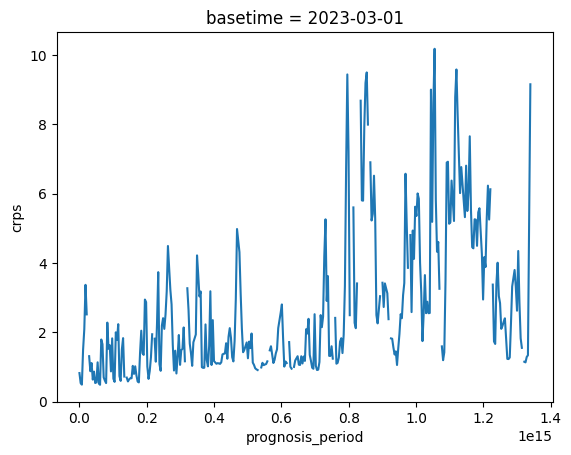

In [9]:
# CRPS for Wind
verifs[1].isel(basetime=0)['crps'].plot()

## API

In [10]:
import os
from verif.models.dt_verif import VerifDT

verif_dlite = VerifDT(station_id='93439',
                     dt_start=datetime.datetime(2023, 3, 1),
                     dt_end=datetime.datetime(2023, 3, 30),
                     obs_source='API_obs',
                     model='DLITE',
                     model_vars=['TTTTT', 'fff10'],
                     api_key=os.environ.get('API_KEY_1minAPI'))

# Run the verification
# verifs = verif_dlite.verify_vars()